## **K-Means Algorithm (Lloyd’s Algorithm)**


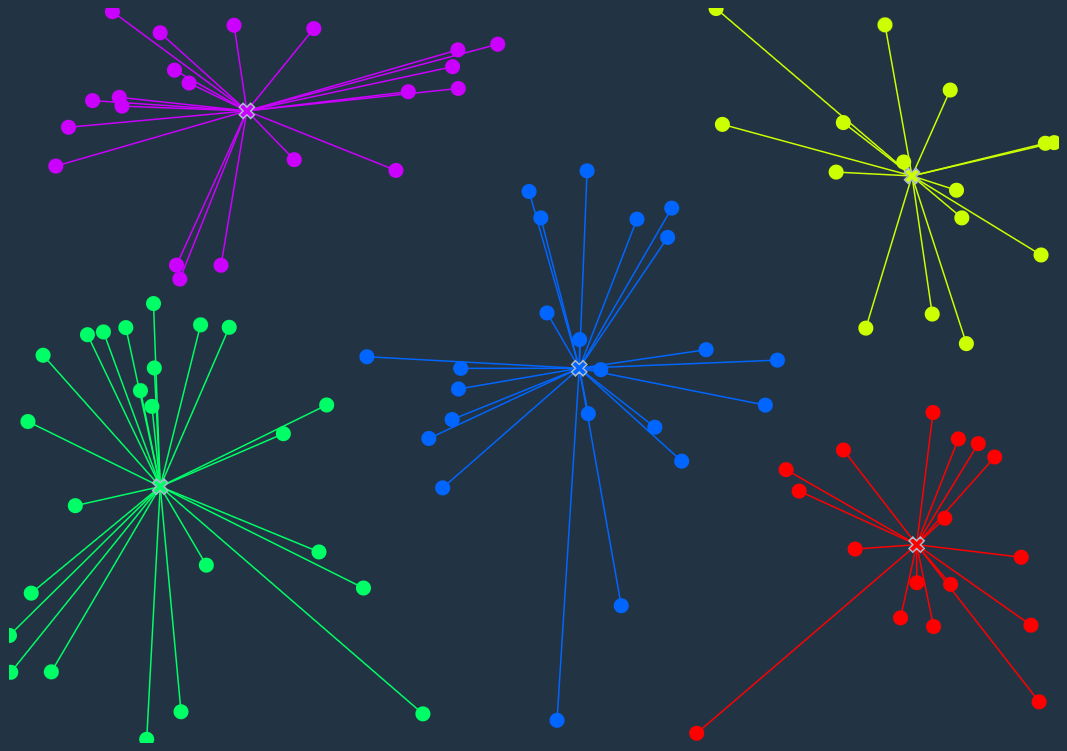


**1. Initialization**

From the given dataset '**D**', we pick '**K**' points randomly, and assume them to be the initial centroids. Let us denote them as $C_1, C_2, C_3, …, C_k$


**2. Assignment**

For each point '$x_i$' in the dataset '**D**', we have to compute the distance of each of the above 'K' centroids, and pick the nearest centroid. Let us denote this nearest centroid as '$C_j$'.

Add the point '$x_i$' to the set '$S_j$'(which is associated with the centroid '$C_j$').


**3. Recompute Centroid (Update Stage)**

- Now  that we've grouped all the datapoints to each clusters, we update the centroid for each and every clusters.


- We recompute/update '$C_j$' as follows:

    - $C_j = (1/|S_j|) * Σ_{x_i∈S_j} x_i$


**4. Repeat the assignment and update steps until convergence**.

**Q. How do we know if algorithm has converged?**

- Here convergence is the stage where the centroids do not change much.

- For example, after second iteration, if the centroids are $\{C_1, C_2, C_3, …., C_k\}$ and 3rd iteration, if the updated centroids are $C_1$', $C_2$', $C_3$', ….., $C_k$', we say the algorithm has converged if the distance between old centroids and updated centroids is very low.
,

- After convergence, we get centroids as $C_1, C_2, C_3, …., C_k$ and the final sets/clusters as $S_1, S_2, S_3, …., S_k$.


## Objective Function

Given a set of observations $\left(\mathbf{x}_1, \mathbf{x}_2, \ldots, \mathbf{x}_n\right)$, where each observation is a $d$-dimensional real vector, $k$-means clustering aims to partition the $n$ observations into $k(\leq n)$ sets $\mathbf{S}=\left\{S_1, S_2, \ldots, S_k\right\}$ so as to minimize the within-cluster sum of squares (WCSS).\

**Loss Function** $=\sum_{i=1}^k \sum_{\mathbf{x} \in S_i}\left\|\mathbf{x}-\boldsymbol{\mu}_i\right\|^2$\
where $\mu_i$ is the mean (also called centroid) of points in $S_i$, i.e.
$$
\boldsymbol{\mu}_{\boldsymbol{i}}=\frac{1}{\left|S_i\right|} \sum_{\mathbf{x} \in S_i} \mathbf{x}
$$

## K-Means++ Algorithm:

KMeans++ is same as KMeans algorithm except the initialization of the cluster centroids.
In KMeans++, first cluster centroid is chosen at random. Then the second cluster centroid is chosen probabilistically such that the probability of choosing a point as the second cluster centroid is directly proportional to the square of its distance from the already chosen first cluster centroid. Similarly the probability of choosing another point as the third cluster centroid is directly proportional to the square of the minimum of its distances from the already chosen first and second cluster centroid and so on...

##  

##  

##  

##  

In [ ]:

class my_KMeans:

  @classmethod
  def get_label(cls, pt, cluster_centers):
    cluster_dist = np.sqrt(np.sum((pt - cluster_centers) ** 2, axis = 1))
    return np.argmin(cluster_dist)

  @classmethod
  def check_random_state(cls, random_state):
    from sklearn.utils import check_random_state
    return check_random_state(random_state)

  @classmethod
  def sample_without_replacement(cls, n_population, n_samples, random_state_):
    from sklearn.utils.random import sample_without_replacement
    return sample_without_replacement(n_population = n_population, n_samples = n_samples, random_state = random_state_)

  def __init__(self, n_clusters = 8, init = 'random', n_init = 10, max_iter = 300, random_state = 1):
    import numpy as np
    import warnings
    self.init = init
    if self.init not in {'random', 'k-means++'} and type(self.init) != np.ndarray and type(self.init) != list:
      raise Exception('The argument for initialization method i.e. init must be either "random",  "k-means++" or an array of cluster centers')
    elif self.init in {'random', 'k-means++'}:
      self.n_clusters = n_clusters
      self.n_init = n_init
    else:
      self.init = np.array(self.init)
      self.n_clusters = (self.init).shape[0]
      if n_init > 1:
        warnings.warn("Warning: Setting number of initiliazations i.e. 'n_init' to 1 as cluster centers are passed as argument")
      self.n_init = 1

    self.max_iter = max_iter
    self.random_state = random_state


  def fit(self, X):
    import numpy as np
    n, d = X.shape
    if self.init not in {'random', 'k-means++'} and ((self.init).shape[1] != X.shape[1]):
      raise Exception("The dimensions of the initialized cluster centers doesn't match with the dimensions of the data")
    random_state = self.check_random_state(self.random_state)
    final_cluster_centers = None
    final_labels = None
    least_inertia = np.inf

    for iter_ in range(self.n_init):

      if self.init == 'random':
        cluster_centers_indexes = my_KMeans.sample_without_replacement(n_population = n, n_samples = self.n_clusters, random_state_ = random_state)
        cluster_centers = X[cluster_centers_indexes, :]

      elif self.init == 'k-means++':
        cluster_centers_indexes = my_KMeans.sample_without_replacement(n_population = n, n_samples = 1, random_state_ = random_state)
        cluster_centers = X[cluster_centers_indexes, :]
        while len(cluster_centers_indexes) < self.n_clusters:
          nearest_cluster_center_dist_sq = np.array([])
          for i, pt in enumerate(X):
            cluster_center_dist_sq = np.sum((pt - cluster_centers) ** 2, axis = 1)
            min_cluster_center_dist_sq = min(cluster_center_dist_sq)
            nearest_cluster_center_dist_sq = np.append(nearest_cluster_center_dist_sq, min_cluster_center_dist_sq)
          cluster_center_probas = nearest_cluster_center_dist_sq/np.sum(nearest_cluster_center_dist_sq)
          cluster_center_index = np.random.choice(range(n), p = cluster_center_probas)
          cluster_center = X[[cluster_center_index]]
          while cluster_center_index in cluster_centers_indexes:
            cluster_center_index = np.random.choice(range(n), p = cluster_center_probas)
            cluster_center = X[[cluster_center_index]]

          cluster_centers_indexes = np.append(cluster_centers_indexes, cluster_center_index)
          cluster_centers = np.vstack((cluster_centers, cluster_center))

      else:
        cluster_centers = self.init

      labels = np.zeros(n,)

      for i in range(self.max_iter):
        for idx, pt in enumerate(X):
          cluster_label = my_KMeans.get_label(pt, cluster_centers)
          labels[idx] = cluster_label
        for label in range(self.n_clusters):
          cluster_pts = X[labels == label]
          cluster_centers[label, :] = np.mean(cluster_pts, axis = 0)

      inertia = 0

      for label, cluster_center in enumerate(cluster_centers):
        cluster_pts = X[labels == label]
        inertia += np.sum((cluster_pts - cluster_center) ** 2)
      if inertia < least_inertia:
        least_inertia = inertia
        final_cluster_centers = cluster_centers
        final_labels = labels

    self.labels_ = final_labels
    self.cluster_centers_ = final_cluster_centers
    self.inertia_ = least_inertia


  def predict(self, X):
    if 'labels_' not in dir(self):
      raise Exception("The model has not been fit on data yet")
    import numpy as np
    n = X.shape[0]
    labels = np.zeros(n,)

    for idx, pt in enumerate(X):
      cluster_label = my_KMeans.get_label(pt, self.cluster_centers_)
      labels[idx] = cluster_label
    return labels


  def fit_predict(self, X):
    import numpy as np
    self.fit(X)
    return self.labels_